# Results of the personality test (interpreting REP grids)

First, import and wrangle the data set to achieve:
1. A grid of the rating results
2. Correct names for the columns (poles)
3. Row indexes that list each person

## Basic wrangling of data sets

In [23]:
# Doing the imports
import pandas as pd
import re
import seaborn as sns
import numpy as np
from scipy.cluster import hierarchy

np.set_printoptions(precision=3, linewidth=100, suppress=True)

df_raw = pd.read_csv('test_data.csv')
df_raw.head()

col_list = list(df_raw.columns)

# Use the following command to print a list and then reorder to create the dfs listed below
#print(col_list)

# Getting a df of the people used
df_people = df_raw[['role01', 'role02', 'role03', 'role04', 'role05', 'role06', 'role07', 'role08', 'role09', 
             'role10', 'role11', 'role12', 'role13', 'role14', 'role15']]
# Creating a df of the positive poles of each construct
df_pos_constructs = df_raw[['construct1pos', 'construct2pos', 'construct3pos', 'construct4pos', 'construct5pos', 
                     'construct6pos', 'construct7pos', 'construct8pos', 'construct9pos', 'construct10pos', 
                     'construct11pos', 'construct12pos', 'construct13pos', 'construct14pos', 'construct15pos']].T
# Df of negative construct poles
df_neg_constructs = df_raw[['construct1neg', 'construct2neg', 'construct3neg', 'construct4neg', 'construct5neg', 
                     'construct6neg', 'construct7neg', 'construct8neg', 'construct9neg', 'construct10neg', 
                     'construct11neg', 'construct12neg', 'construct13neg', 'construct14neg', 'construct15neg']].T
# Df (and wrangling) of main ratings matrix for PCA
df_ratings = df_raw[['id','rating_p1_const1', 'rating_p1_const2', 'rating_p1_const3', 'rating_p1_const4', 'rating_p1_const5', 
              'rating_p1_const6', 'rating_p1_const7', 'rating_p1_const8', 'rating_p1_const9',  'rating_p1_const10', 
              'rating_p1_const11', 'rating_p1_const12', 'rating_p1_const13', 'rating_p1_const14', 'rating_p1_const15',
              'rating_p2_const1',  'rating_p2_const2', 'rating_p2_const3', 'rating_p2_const4', 'rating_p2_const5', 
              'rating_p2_const6', 'rating_p2_const7', 'rating_p2_const8', 'rating_p2_const9', 'rating_p2_const10', 
              'rating_p2_const11', 'rating_p2_const12', 'rating_p2_const13', 'rating_p2_const14', 'rating_p2_const15',
              'rating_p3_const1', 'rating_p3_const2', 'rating_p3_const3', 'rating_p3_const4', 'rating_p3_const5', 
              'rating_p3_const6', 'rating_p3_const7', 'rating_p3_const8', 'rating_p3_const9', 'rating_p3_const10', 
              'rating_p3_const11', 'rating_p3_const12', 'rating_p3_const13', 'rating_p3_const14', 'rating_p3_const15', 
              'rating_p4_const1', 'rating_p4_const2', 'rating_p4_const3', 'rating_p4_const4', 'rating_p4_const5', 
              'rating_p4_const6', 'rating_p4_const7', 'rating_p4_const8', 'rating_p4_const9', 'rating_p4_const10', 
              'rating_p4_const11', 'rating_p4_const12', 'rating_p4_const13', 'rating_p4_const14', 'rating_p4_const15', 
              'rating_p5_const1', 'rating_p5_const2', 'rating_p5_const3', 'rating_p5_const4', 'rating_p5_const5', 
              'rating_p5_const6', 'rating_p5_const7', 'rating_p5_const8', 'rating_p5_const9', 'rating_p5_const10', 
              'rating_p5_const11', 'rating_p5_const12', 'rating_p5_const13', 'rating_p5_const14', 'rating_p5_const15', 
              'rating_p6_const1', 'rating_p6_const2', 'rating_p6_const3', 'rating_p6_const4', 'rating_p6_const5', 
              'rating_p6_const6', 'rating_p6_const7', 'rating_p6_const8', 'rating_p6_const9', 'rating_p6_const10', 
              'rating_p6_const11', 'rating_p6_const12', 'rating_p6_const13', 'rating_p6_const14', 'rating_p6_const15', 
              'rating_p7_const1', 'rating_p7_const2', 'rating_p7_const3', 'rating_p7_const4', 'rating_p7_const5', 
              'rating_p7_const6', 'rating_p7_const7', 'rating_p7_const8', 'rating_p7_const9', 'rating_p7_const10', 
              'rating_p7_const11', 'rating_p7_const12', 'rating_p7_const13', 'rating_p7_const14', 'rating_p7_const15', 
              'rating_p8_const1', 'rating_p8_const2', 'rating_p8_const3', 'rating_p8_const4', 'rating_p8_const5', 
              'rating_p8_const6', 'rating_p8_const7', 'rating_p8_const8', 'rating_p8_const9', 'rating_p8_const10', 
              'rating_p8_const11', 'rating_p8_const12', 'rating_p8_const13', 'rating_p8_const14', 'rating_p8_const15', 
              'rating_p9_const1', 'rating_p9_const2', 'rating_p9_const3', 'rating_p9_const4', 'rating_p9_const5', 
              'rating_p9_const6', 'rating_p9_const7', 'rating_p9_const8', 'rating_p9_const9', 'rating_p9_const10', 
              'rating_p9_const11', 'rating_p9_const12', 'rating_p9_const13', 'rating_p9_const14', 'rating_p9_const15', 
              'rating_p10_const1', 'rating_p10_const2', 'rating_p10_const3', 'rating_p10_const4', 'rating_p10_const5', 
              'rating_p10_const6', 'rating_p10_const7', 'rating_p10_const8', 'rating_p10_const9', 'rating_p10_const10', 
              'rating_p10_const11', 'rating_p10_const12', 'rating_p10_const13', 'rating_p10_const14', 'rating_p10_const15',     
              'rating_p11_const1', 'rating_p11_const2', 'rating_p11_const3', 'rating_p11_const4', 'rating_p11_const5', 
              'rating_p11_const6', 'rating_p11_const7', 'rating_p11_const8', 'rating_p11_const9', 'rating_p11_const10', 
              'rating_p11_const11', 'rating_p11_const12', 'rating_p11_const13', 'rating_p11_const14', 'rating_p11_const15', 
              'rating_p12_const1', 'rating_p12_const2', 'rating_p12_const3', 'rating_p12_const4', 'rating_p12_const5', 
              'rating_p12_const6', 'rating_p12_const7', 'rating_p12_const8', 'rating_p12_const9', 'rating_p12_const10', 
              'rating_p12_const11', 'rating_p12_const12', 'rating_p12_const13', 'rating_p12_const14', 'rating_p12_const15', 
              'rating_p13_const1', 'rating_p13_const2', 'rating_p13_const3', 'rating_p13_const4', 'rating_p13_const5', 
              'rating_p13_const6', 'rating_p13_const7', 'rating_p13_const8', 'rating_p13_const9', 'rating_p13_const10', 
              'rating_p13_const11', 'rating_p13_const12', 'rating_p13_const13', 'rating_p13_const14', 'rating_p13_const15', 
              'rating_p14_const1', 'rating_p14_const2', 'rating_p14_const3', 'rating_p14_const4', 'rating_p14_const5', 
              'rating_p14_const6', 'rating_p14_const7', 'rating_p14_const8', 'rating_p14_const9', 'rating_p14_const10', 
              'rating_p14_const11', 'rating_p14_const12', 'rating_p14_const13', 'rating_p14_const14', 'rating_p14_const15', 
              'rating_p15_const1', 'rating_p15_const2', 'rating_p15_const3', 'rating_p15_const4', 'rating_p15_const5', 
              'rating_p15_const6', 'rating_p15_const7', 'rating_p15_const8', 'rating_p15_const9', 'rating_p15_const10', 
              'rating_p15_const11', 'rating_p15_const12', 'rating_p15_const13', 'rating_p15_const14', 'rating_p15_const15'
                    ]]
# Rename the columns (could simplify above syntax by putting this earlier)
df_ratings.columns = [re.sub("rating_","", col_name) for col_name in df_ratings.columns]
# Making an ordered list of stub names for use in the wide-to-long command
target_ids=['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9', 'p10', 'p11', 'p12', 'p13', 'p14', 'p15']
# Making the initial long format matrix (transpose at the end)
ratings_matrix = pd.wide_to_long(df_ratings, 
                stubnames=target_ids,
               i='id', j='const', sep='_const')
ratings_matrix.columns = ['c1','c2','c3','c4','c5','c6','c7','c8','c9','c10','c11','c12','c13','c14','c15']

# Making an ordered list of people's names
people_names = list(df_people.T[0])

# Also need to make a list of construct names
df_construct_list = df_pos_constructs.reset_index()
df_construct_list['neg'] = df_neg_constructs.reset_index().iloc[:,1]
df_construct_list = df_construct_list.drop(['index'], axis=1)
df_construct_list.columns = ['pos','neg']
df_construct_list['combined'] = df_construct_list[['pos', 'neg']].apply(lambda x: ' - '.join(x), axis=1)
pos_handles = list(df_pos_constructs.iloc[:,0])
neg_handles = list(df_neg_constructs.iloc[:,0])


In [24]:
np.set_printoptions(suppress=True)

In [25]:
# Tweaks for the test dataset

# The original dataframe had values for first target that were off by one, so run below when running the test data set
ratings_matrix.iloc[0,:] -= 1
people_names[14]='recep'
#people_names[15]='ME'


In [26]:
ratings_matrix

c1  c2  c3  c4  c5  c6  c7  c8  c9  c10  c11  c12  c13  c14  c15
id const                                                                  
1  1       0   1   0  -1  -1  -1  -1   1   0   -1    1   -1    1    1   -1
   2       0   0  -1   0  -1  -1  -1  -1  -1    1    1    0    1    1   -1
   3      -1  -1  -1  -1  -1  -1  -1  -1   1    1    1    1   -1    1    1
   4      -1   1   1   1   1   1  -1   0   1    1    1    1    1    1   -1
   5      -1  -1   0  -1  -1  -1  -1   0  -1   -1    1   -1    1    0   -1
   6       0  -1  -1  -1   0   1   0  -1   1    1   -1   -1   -1   -1    1
   7       0  -1   0   0   1   1   1  -1   1    1    0   -1   -1    0   -1
   8      -1  -1   0   0  -1  -1   1   1  -1    0    1    1    0   -1    1
   9       1   1   1   1  -1  -1  -1   1  -1   -1   -1    0    0   -1   -1
   10      1   1   1   1  -1  -1   1   1  -1   -1   -1    1    1   -1    1
   11     -1   0  -1  -1  -1   0   1  -1   1    1    0    1    1    1    1
   12     -1   0   0   1   0   1   0   1  -1    1   -1    0    0   -1   -1
   13      1   1   1   1   1  -1  -1   1   0   -1    0    0    0    0   -1
   14      0   1   1   0  -1  -1  -1   1  -1   -1   -1   -1    1    0    1
   15     -1   0  -1   0  -1   1   0   0   1    1   -1   -1   -1   -1    1

# FA and automatic knee
This section runs factor analysis over the ratings matrix and then automatically detects the point of maximum curvature to return the best set of components that the individual uses to determine people's personalities.
The automatic knee comes from the <a href='https://github.com/arvkevi/kneed'>kneed</a> library implementation of <a href='https://raghavan.usc.edu//papers/kneedle-simplex11.pdf'>Satopåå et al's</a> work.

I chose an oblimin rotation as people's views of others are unlikely to exist on orthogonal dimensions.

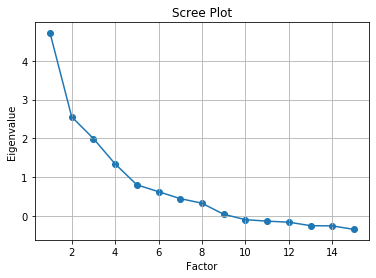

The best knee in this dataset is 5 factors


In [30]:
import matplotlib.pyplot as plt

# Fit the initial factor analysis
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(n_factors=10, rotation='oblimin')
fa.fit(ratings_matrix)

# Scree plot
x = list(range(1,16))

fa_eigens = fa.get_eigenvalues()[1]
plt.scatter(range(1, 16), fa_eigens)
plt.plot(x, fa_eigens)
plt.title('Scree Plot')
plt.xlabel("Factor")
plt.ylabel("Eigenvalue")
plt.grid()
plt.show()

# Find the knee
from kneed import KneeLocator

fa_matrix_knee = KneeLocator(x, fa_eigens, S=1.0, curve='convex', direction='decreasing')
fa_knee = fa_matrix_knee.knee
print('The best knee in this dataset is {} factors'.format(fa_knee))
#print('The eigenvalue of the best knee is {}'.format(fa_matrix_knee.knee_y))

### Refitting with limited factor numbers
Once we have the knee, the analysis is re-run with the limited number of factors to obtain the factor loadings table, and also the person scores.

In [32]:
# Refit with the knee
fa_kneed = FactorAnalyzer(n_factors=fa_knee, rotation='varimax').fit(ratings_matrix)

# A couple of useful components here
#fa_kneed.get_factor_variance()
#fa_kneed.get_eigenvalues()

# Construct the factor loadings table, with percentages in the headings
fa_loadings = pd.DataFrame(fa_kneed.loadings_.round(2))
fa_loadings.index = df_construct_list['combined']
fa_loadings.index = fa_loadings.index.rename(name='Construct')
fa_loadings.columns = ['Factor {} ({:.0f}%)'.format(i+1, fa_kneed.get_factor_variance()[1][i]*100) for i in fa_loadings.columns]

# Construct the score for each target on each factor
# Need a people x component scores matrix
target_scores = pd.DataFrame(np.dot(ratings_matrix.T, fa_loadings))
target_scores.index = people_names # Give the correct indices
target_scores.columns = fa_loadings.columns # Label the columns

Below is an example of a factor loading matrix but formatted as a heatmap

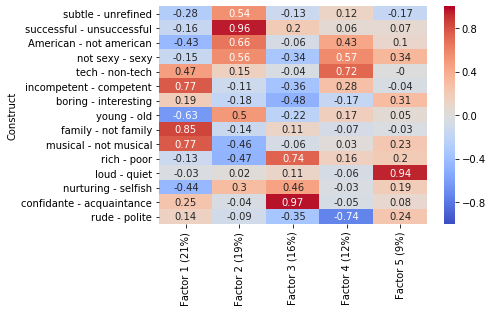

In [33]:
sns.heatmap(fa_loadings, annot=True, vmin=-1, vmax=1, center=0, cmap='coolwarm')

And here are the scores on each factor for my targets as a heatmap

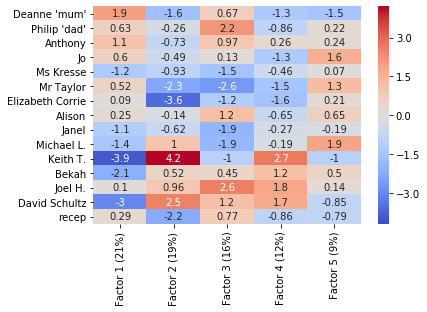

In [34]:
sns.heatmap(target_scores, annot=True, vmin=-4.2, vmax=4.2, center=0, cmap='coolwarm')

### Prose description of the loading tables
The top three loadings for each factor and the top positive and negative exemplars are interpreted below. This is much quicker for humans to do than it is to initally code.
(Given the oblimin rotation, I was less worried about cross-loadings, and I also did not particularly need to worry about loadings close to zero. These assumptions should be checked as data accrues.)

In [37]:
''' This section finds the top handles and also the top and bottom exemplars'''
# Make a version of the table with an integer index for use in future functions
fa_top3 = fa_loadings.reset_index()

def get_pos_handles(df, col_idx):
    '''For a dataframe, gives the handles for the top three loadings on the positive pole for that column.
    Important: the dataframe index must be an integer.'''
    # Make the top three
    top3_mask = df.iloc[:,col_idx].abs().nlargest(3).index
    top3_constructs = df.loc[top3_mask]
    pos_top3 = [] # Make a return list
    for i in range(0,3):     # Then get the handles for the top three constructs
        if top3_constructs.iloc[i,col_idx] > 0: # for positive loadings
            pos_top3.append(pos_handles[top3_constructs.index[i]])
        elif top3_constructs.iloc[i,col_idx] < 0: # for negative loadings
            pos_top3.append(neg_handles[top3_constructs.index[i]])
    return pos_top3     # Return a list    

def get_neg_handles(df, col_idx):
    '''For a dataframe, gives the handles for the top three loadings on the negative pole for that column.
    Important: the dataframe index must be an integer.'''
    # Make the top three
    top3_mask = df.iloc[:,col_idx].abs().nlargest(3).index
    top3_constructs = df.loc[top3_mask]
    pos_top3 = [] # Make a return list
    for i in range(0,3):     # Then get the handles for the top three constructs
        if top3_constructs.iloc[i,col_idx] < 0: # for negative loadings
            pos_top3.append(pos_handles[top3_constructs.index[i]])
        elif top3_constructs.iloc[i,col_idx] > 0: # for positive loadings
            pos_top3.append(neg_handles[top3_constructs.index[i]])
    return pos_top3     # Return a list    


# Finding the max on a dimension
def max_scorer(col_idx):
    '''This function returns the name of the most positive exemplar of a component'''
    return target_scores.iloc[target_scores.iloc[:,col_idx].argsort()].index[-1]

# Finding the min on a dimension
def min_scorer(col_idx):
    '''This function returns the name of the most negative exemplar of a component'''
    return target_scores.iloc[target_scores.iloc[:,col_idx].argsort()].index[0]

## How do you think about others?
Below is a description of the major dimensions along which you judge the differences between people you know.

In [38]:
for j in range(1,fa_knee+1):
    pos_3 = get_pos_handles(fa_top3, j)
    neg_3 = get_neg_handles(fa_top3, j)
    pos_exemplar = max_scorer(j-1)
    neg_exemplar = min_scorer(j-1)
    position=['first', 'second','third','fourth','fifth','sixth','seventh','eighth']
#    print(pos_3)
#    print(neg_3)
#    print(pos_exemplar)
#    print(neg_exemplar)
    print('Factor {} ({} vs {}), {:.2f}% of ratings'.format(j, pos_3, neg_3, fa_kneed.get_factor_variance()[1][j-1]*100))
    print('One end of the {} way you think about people is how much they are {}, {} and {}. You think {} is most like this.'.
         format(position[j-1], pos_3[0], pos_3[1], pos_3[2], pos_exemplar))
    print('The other end of this factor is how much a person is {}, {} and {}. You think {} is most like this.'.
         format(neg_3[0], neg_3[1], neg_3[2], neg_exemplar))
    print('')


Factor 1 (['family', 'incompetent', 'musical'] vs ['not family', 'competent', 'not musical']), 20.99% of ratings
One end of the first way you think about people is how much they are family, incompetent and musical. You think Deanne 'mum' is most like this.
The other end of this factor is how much a person is not family, competent and not musical. You think Keith T. is most like this.

Factor 2 (['successful', 'American', 'not sexy'] vs ['unsuccessful', 'not american', 'sexy']), 18.87% of ratings
One end of the second way you think about people is how much they are successful, American and not sexy. You think Keith T. is most like this.
The other end of this factor is how much a person is unsuccessful, not american and sexy. You think Elizabeth Corrie is most like this.

Factor 3 (['confidante', 'rich', 'interesting'] vs ['acquaintance', 'poor', 'boring']), 16.28% of ratings
One end of the third way you think about people is how much they are confidante, rich and interesting. You think 

## Now to put yourself on the map.
To answer the age old school taunt "I know you are but what am I?" we have constructed numberlines for each factor to show where you think you fit compared to others!

In [39]:
# Use self data and add it
self_ratings = [1,0,-1,-1,1,-1,-1,0,1,1,0,0,1,1,-1]
 b
print(self_scores)


[ 1.1  -0.49  2.9   0.35 -0.65]


How you everyone on Factor 1. (You are the red star)


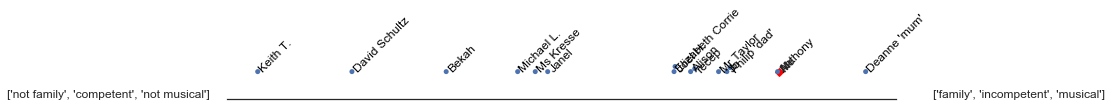




How you everyone on Factor 2. (You are the red star)


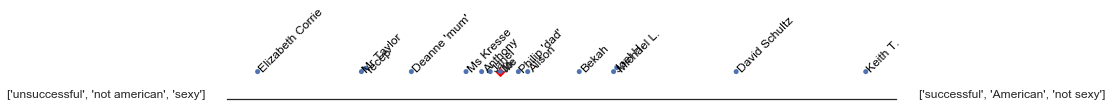




How you everyone on Factor 3. (You are the red star)


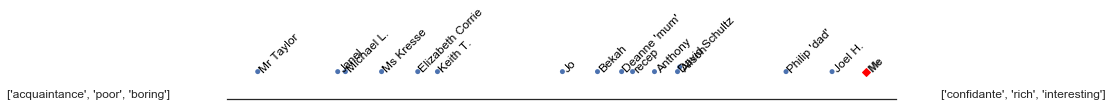




How you everyone on Factor 4. (You are the red star)


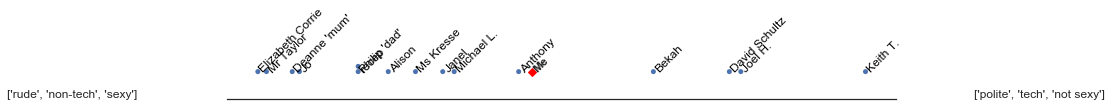




How you everyone on Factor 5. (You are the red star)


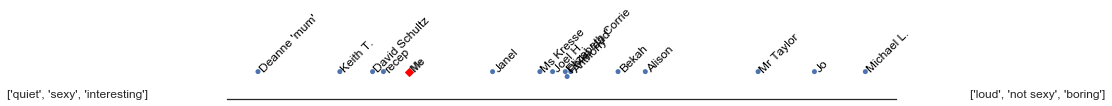

In [40]:
# Take note that the version in the final app does not have the same args in labelling the axes, as this version
# appears to work in the notebook only.

x = list(range(1,16))

for i in range(0,self_scores.shape[0]):
    x = target_scores.iloc[:,i]
    print('How you everyone on Factor {}. (You are the red star)'.format(i+1))
    # Make swarmplot
    plt.figure(figsize=(12, 1))
    sns.set(style="white")
    ax = sns.swarmplot(x=x, linewidth=0)
    # Format the correct axis
    sns.despine(top=True, left=True)
    plt.xlabel('')
    plt.xticks([],[])
    # Then label the points
    for person in range(0,x.shape[0]):
        ax.text(x[person], 0, people_names[person], horizontalalignment='left', rotation=45, size='medium', color='black')
    # Add self dot in different color
    ax.plot(self_scores[i], 0 , 'rD', color='red', )
    ax.text(self_scores[i], 0, 'Me', rotation=45, weight='bold')
    # Label the two axes
    ax.annotate(get_neg_handles(fa_top3, i+1), xy=(-.34,0), xycoords="axes fraction",
                xytext=(8,0), textcoords="offset points", ha="left", va="bottom")
    ax.annotate(get_pos_handles(fa_top3, i+1), xy=(1.3,0), xycoords="axes fraction",
                xytext=(8,0), textcoords="offset points",
                ha="right", va="bottom")
    # Put on the factor axes
    plt.show()
    print('')
    print('')
    print('')


## Are there groups of people?
A related question is whether some people are more similar to each other. Below is a dendogram, which shows how similar people are to each other. The lower the join between two people, the more similar they are in how you rate them. You will often find colored clusters of people who you rate similarly to each other.
Links near the top of the chart show join groups that are less similar to each other.

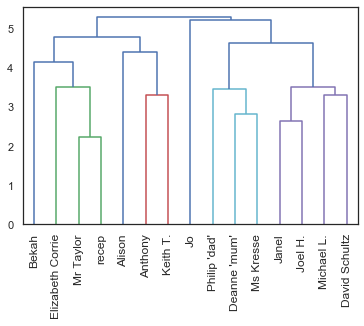

In [309]:
from scipy.cluster import hierarchy

Z = hierarchy.linkage(ratings_matrix, 'average')
plt.figure()
dn = hierarchy.dendrogram(Z, labels=people_names, leaf_rotation=90)


## Is this the whole truth?
Not quite, the descriptions are perhaps a little simplified. The full data tables are below, you can interpret them at your own discretion.
Also, please note this is a shortened version of Kelly's original idea. If you want the longer version of the test, you can check it out in Kelly's work.

## Can I change how I view others?
<b>Yes</b>, and the best way is to stop expecting people to fit these patterns. Let them surprise you. People won't always act in the same ways. Learning these differences and noticing people again, giving them a chance to be different, can help you see new things in others.